# 14장. 베스트 모델 만들기 +모델 업데이트

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K 
#keras를 backend로 가져온다 넣어도 빼도 상관없음

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df_pred = pd.read_csv('../data/wine.csv', header=None)
df = df_pred.sample(frac=1) #샘플 추출(frac=1은 100프로 가져옴)

dataset = df.values
X = dataset[:,0:12]
X = np.asarray(X).astype(np.float32)
Y = dataset[:,12]

In [3]:
print(df.head(5))

       0     1     2     3      4     5      6        7     8     9     10  11  12
5316  6.3  0.18  0.24   3.4  0.053  20.0  119.0  0.99373  3.11  0.52   9.2   6   0
5210  6.8  0.14  0.18   1.4  0.047  30.0   90.0  0.99164  3.27  0.54  11.2   6   0
3518  7.3  0.22  0.50  13.7  0.049  56.0  189.0  0.99940  3.24  0.66   9.0   6   0
1622  7.6  0.67  0.14   1.5  0.074  25.0  168.0  0.99370  3.05  0.51   9.3   5   0
2443  7.3  0.21  0.29   1.6  0.034  29.0  118.0  0.99170  3.30  0.50  11.0   8   0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5316 to 2732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [5]:
# 모델 설정 - 은닉층 4개
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [6]:
model.summary()  
#390(12*30+30) _마지막 30은 : bias편향 값
#372(30*12+12)
#104(12*8+8)
#9(8*1+1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', #분류는 binary_crossentropy
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X, Y, epochs=200, batch_size=200)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
33/33 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.7522
Epoch 2/200
33/33 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8952
Epoch 3/200
33/33 [==============================] - 0s 781us/step - loss: 0.2476 - accuracy: 0.9235
Epoch 4/200
33/33 [==============================] - 0s 750us/step - loss: 0.2302 - accuracy: 0.9272
Epoch 5/200
33/33 [==============================] - 0s 750us/step - loss: 0.2201 - accuracy: 0.9280
Epoch 6/200
33/33 [==============================] - 0s 781us/step - loss: 0.2100 - accuracy: 0.9312
Epoch 7/200
33/33 [==============================] - 0s 719us/step - loss: 0.2019 - accuracy: 0.9338
Epoch 8/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9341
Epoch 9/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1922 - accuracy: 0.9364
Epoch 10/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9372

33/33 [==============================] - 0s 687us/step - loss: 0.0634 - accuracy: 0.9798
Epoch 82/200
33/33 [==============================] - 0s 719us/step - loss: 0.0655 - accuracy: 0.9805
Epoch 83/200
33/33 [==============================] - 0s 687us/step - loss: 0.0638 - accuracy: 0.9809
Epoch 84/200
33/33 [==============================] - 0s 719us/step - loss: 0.0638 - accuracy: 0.9803
Epoch 85/200
33/33 [==============================] - 0s 687us/step - loss: 0.0629 - accuracy: 0.9801
Epoch 86/200
33/33 [==============================] - 0s 688us/step - loss: 0.0636 - accuracy: 0.9797
Epoch 87/200
33/33 [==============================] - 0s 688us/step - loss: 0.0602 - accuracy: 0.9818
Epoch 88/200
33/33 [==============================] - 0s 688us/step - loss: 0.0632 - accuracy: 0.9801
Epoch 89/200
33/33 [==============================] - 0s 750us/step - loss: 0.0625 - accuracy: 0.9811
Epoch 90/200
33/33 [==============================] - 0s 782us/step - loss: 0.0660 - accuracy: 

33/33 [==============================] - 0s 687us/step - loss: 0.0492 - accuracy: 0.9854
Epoch 162/200
33/33 [==============================] - 0s 719us/step - loss: 0.0506 - accuracy: 0.9860
Epoch 163/200
33/33 [==============================] - 0s 687us/step - loss: 0.0503 - accuracy: 0.9858
Epoch 164/200
33/33 [==============================] - 0s 687us/step - loss: 0.0542 - accuracy: 0.9823
Epoch 165/200
33/33 [==============================] - 0s 687us/step - loss: 0.0553 - accuracy: 0.9821
Epoch 166/200
33/33 [==============================] - 0s 750us/step - loss: 0.0490 - accuracy: 0.9854
Epoch 167/200
33/33 [==============================] - 0s 688us/step - loss: 0.0517 - accuracy: 0.9840
Epoch 168/200
33/33 [==============================] - 0s 719us/step - loss: 0.0518 - accuracy: 0.9825
Epoch 169/200
33/33 [==============================] - 0s 687us/step - loss: 0.0549 - accuracy: 0.9823
Epoch 170/200
33/33 [==============================] - 0s 750us/step - loss: 0.0556 - a

In [10]:
#수치넣어서 예측해보기 : 0 레드와인으로 나옴
X_test = np.array([[6.3,  0.18,  0.24,   3.4,  0.053,  20.0,  119.0,  0.99373,  3.11,  0.52,   9.2, 6  ]])
y_predict = model.predict(X_test).flatten()

pred = np.argmax(y_predict)
print([pred])

[0]


In [11]:
#모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)  #만일 MODEL_DIR가 없으면 현재 폴더에 만들어주세요
    
#모델 저장조건(베스트모델 저장, 성능좋을때만 기록해 달라.)
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only = True)
#몇번 돌렸을때 val_loss가 얼마인지 다 저장됨.
#epoch02d 는 2자리(40,50 등), 확장자는 hdf5


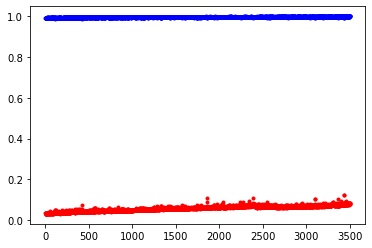

In [9]:
#모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500,verbose=0)

#y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

#y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()


In [10]:
# 자동중단설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)

#모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500,
         callbacks=[early_stopping_callback])


Epoch 1/2000
11/11 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9969 - val_loss: 0.0844 - val_accuracy: 0.9885
Epoch 2/2000
11/11 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9965 - val_loss: 0.0902 - val_accuracy: 0.9900
Epoch 3/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9969 - val_loss: 0.0822 - val_accuracy: 0.9892
Epoch 4/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9921 - val_loss: 0.1033 - val_accuracy: 0.9854
Epoch 5/2000
11/11 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9865 - val_loss: 0.0871 - val_accuracy: 0.9838
Epoch 6/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9913 - val_loss: 0.0880 - val_accuracy: 0.9869
Epoch 7/2000
11/11 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9952 - val_loss: 0.0740 - val_accuracy: 0.9908
Epoch 

11/11 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0891 - val_accuracy: 0.9915
Epoch 59/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9975 - val_loss: 0.0907 - val_accuracy: 0.9900
Epoch 60/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9958 - val_loss: 0.0790 - val_accuracy: 0.9908
Epoch 61/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0887 - val_accuracy: 0.9915
Epoch 62/2000
11/11 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9948 - val_loss: 0.0835 - val_accuracy: 0.9892
Epoch 63/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9958 - val_loss: 0.0804 - val_accuracy: 0.9923
Epoch 64/2000
11/11 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9963 - val_loss: 0.0844 - val_accuracy: 0.9931
Epoch 65/2000